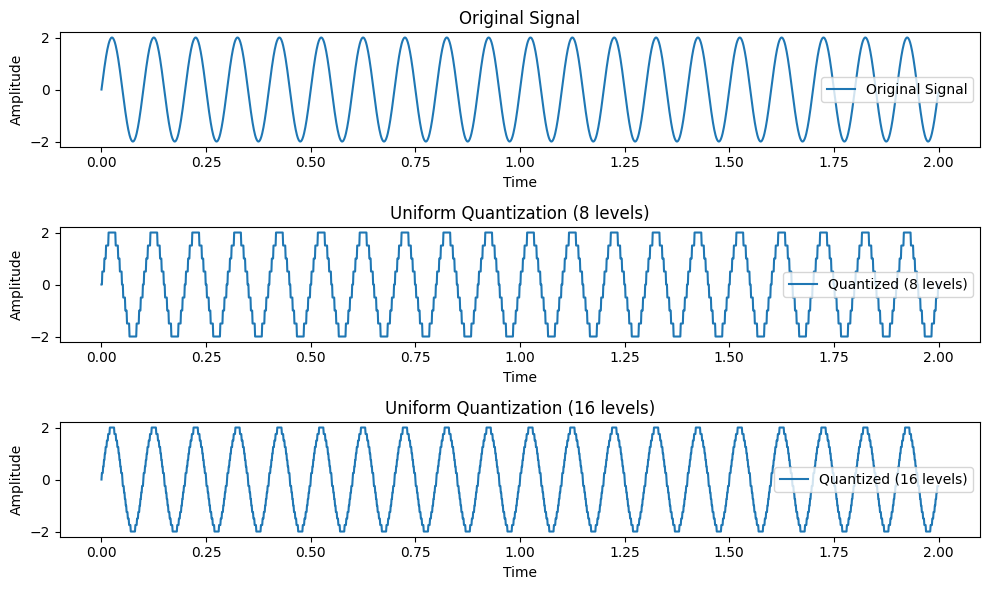

SQNR (8 levels): 20.216258440129522 dB
SQNR (16 levels): 25.716741505738852 dB


In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Function to generate a sinusoidal signal
def generate_sinusoidal_signal(amplitude, frequency, duration, sampling_rate):
    t = np.arange(0, duration, 1/sampling_rate)
    signal = amplitude * np.sin(2 * np.pi * frequency * t)
    return t, signal

# Function to perform uniform quantization
def uniform_quantization(signal, num_levels):
    max_amplitude = max(abs(signal))
    step_size = 2 * max_amplitude / num_levels
    quantized_signal = np.round(signal / step_size) * step_size
    return quantized_signal

# Function to calculate Signal-to-Quantization Noise Ratio (SQNR)
def calculate_sqnr(original_signal, quantized_signal):
    noise = original_signal - quantized_signal
    signal_power = np.sum(original_signal**2)
    noise_power = np.sum(noise**2)
    sqnr = 10 * np.log10(signal_power / noise_power)
    return sqnr

# Parameters
amplitude = 2
frequency = 10
duration = 2  # Two cycles
sampling_rate = 1000
num_levels_8 = 8
num_levels_16 = 16

# Generate sinusoidal signal
t, original_signal = generate_sinusoidal_signal(amplitude, frequency, duration, sampling_rate)

# Uniform quantization with 8 levels
quantized_signal_8 = uniform_quantization(original_signal, num_levels_8)
sqnr_8 = calculate_sqnr(original_signal, quantized_signal_8)

# Uniform quantization with 16 levels
quantized_signal_16 = uniform_quantization(original_signal, num_levels_16)
sqnr_16 = calculate_sqnr(original_signal, quantized_signal_16)

# Plotting
plt.figure(figsize=(10, 6))

plt.subplot(3, 1, 1)
plt.plot(t, original_signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(t, quantized_signal_8, label='Quantized (8 levels)')
plt.title('Uniform Quantization (8 levels)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(t, quantized_signal_16, label='Quantized (16 levels)')
plt.title('Uniform Quantization (16 levels)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()

# Print SQNR values
print(f'SQNR (8 levels): {sqnr_8} dB')
print(f'SQNR (16 levels): {sqnr_16} dB')


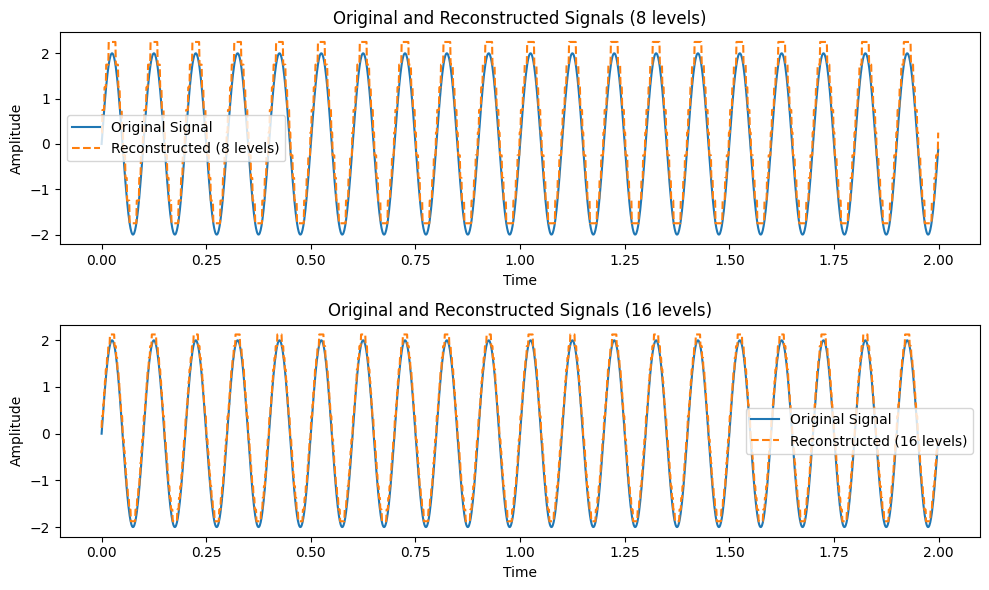

In [14]:
# Function to reconstruct the original signal from quantized signal
def reconstruct_signal(quantized_signal, step_size):
    reconstructed_signal = quantized_signal + 0.5 * step_size
    return reconstructed_signal

# Reconstructing the original signal from quantized signals
reconstructed_signal_8 = reconstruct_signal(quantized_signal_8, 2 * amplitude / num_levels_8)
reconstructed_signal_16 = reconstruct_signal(quantized_signal_16, 2 * amplitude / num_levels_16)

# Plotting the reconstructed signals
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(t, original_signal, label='Original Signal')
plt.plot(t, reconstructed_signal_8, label='Reconstructed (8 levels)', linestyle='--')
plt.title('Original and Reconstructed Signals (8 levels)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(2, 1, 2)
plt.plot(t, original_signal, label='Original Signal')
plt.plot(t, reconstructed_signal_16, label='Reconstructed (16 levels)', linestyle='--')
plt.title('Original and Reconstructed Signals (16 levels)')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()


C:\Users\Yadav\AppData\Local\Temp\ipykernel_2064\2221642258.py:16: RuntimeWarning: invalid value encountered in log
  return np.sign(x) * (np.log(1.0 + mu * np.abs(x)) / np.log(1.0 + mu))


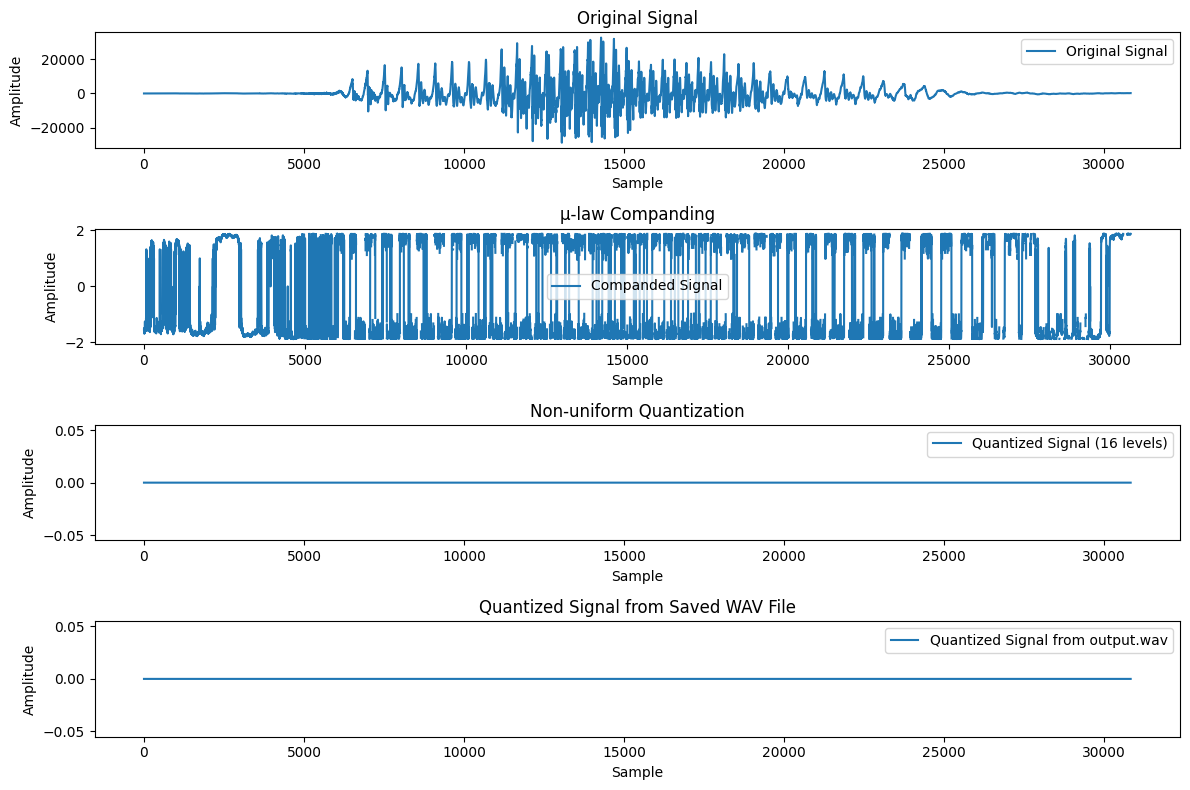

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

def u_law_compand(x, mu):
    """
    Apply µ-law companding to the input signal x.

    Parameters:
    - x: Input signal
    - mu: Compression parameter

    Returns:
    - Companded signal
    """
    return np.sign(x) * (np.log(1.0 + mu * np.abs(x)) / np.log(1.0 + mu))

def inverse_u_law_compand(y, mu):
    """
    Inverse of µ-law companding.

    Parameters:
    - y: Companded signal
    - mu: Compression parameter

    Returns:
    - Original signal
    """
    return np.sign(y) * (1.0 / mu) * ((1.0 + mu)**np.abs(y) - 1.0)

def non_uniform_quantization(x, quantization_bins):
    """
    Perform non-uniform quantization on the input signal x.

    Parameters:
    - x: Input signal
    - quantization_bins: Array of quantization bins

    Returns:
    - Quantized signal
    """
    quantized_signal = np.zeros_like(x)

    for i in range(1, len(quantization_bins)):
        indices = np.logical_and(x >= quantization_bins[i - 1], x < quantization_bins[i])
        quantized_signal[indices] = quantization_bins[i]

    return quantized_signal

# Load the audio signal (replace 'input.wav' with your audio file)
rate, audio_signal = wavfile.read('input.wav')

# Parameters
mu = 255
num_levels = 16

# Apply µ-law companding
companded_signal = u_law_compand(audio_signal, mu)

# Define non-uniform quantization bins
quantization_bins = np.linspace(np.min(companded_signal), np.max(companded_signal), num_levels)

# Perform non-uniform quantization
quantized_signal = non_uniform_quantization(companded_signal, quantization_bins)

# Inverse of µ-law companding to obtain the final quantized signal
quantized_signal_output = inverse_u_law_compand(quantized_signal, mu)

# Plotting
plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(audio_signal, label='Original Signal')
plt.title('Original Signal')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(companded_signal, label='Companded Signal')
plt.title('µ-law Companding')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(quantized_signal, label=f'Quantized Signal ({num_levels} levels)')
plt.title('Non-uniform Quantization')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

# Save the quantized signal as a new WAV file
output_filename = 'output.wav'
wavfile.write(output_filename, rate, quantized_signal_output.astype(np.int16))

# Plot the quantized signal from the saved WAV file
rate_output, quantized_signal_from_file = wavfile.read(output_filename)
plt.subplot(4, 1, 4)
plt.plot(quantized_signal_from_file, label=f'Quantized Signal from {output_filename}')
plt.title('Quantized Signal from Saved WAV File')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.show()
